# Comparing Gspacer and Z3m on HWMCC20 Rules

| | Gspacer | Z3m |
|:--|:--|:--|
| Start | Thursday, October 29, 2020, 5:01:38 PM | Saturday, October 31, 2020 at 13:16:36 |
| End | Friday, October 30, 2020, 0:24:12 AM | Saturday, October 31, 2020 at 22:01:40 |
| Duration | 7 hours, 22 minutes, and 34 seconds | 8 hours, 45 minutes, and 4 seconds |
| Benchmarks | 639 | 639 |
| Timeout | 900 seconds | 900 seconds |
| Branch | `gspacer` | `z3m-fb6e7e1` |
| Options | `-st -v:1 -T:900s fp.xform.slice=true fp.xform.inline_linear=true fp.xform.inline_eager=true fp.xform.tail_simplifier_pve=true fp.engine=spacer fp.print_statistics=true fp.spacer.elim_aux=true fp.spacer.reach_dnf=true fp.spacer.iuc=1 fp.spacer.iuc.arith=1 fp.validate=true fp.spacer.ground_pobs=true fp.spacer.mbqi=false fp.spacer.iuc.print_farkas_stats=false fp.spacer.iuc.old_hyp_reducer=false fp.spacer.ctp=true fp.spacer.weak_abs=true fp.spacer.native_mbp=true fp.spacer.conjecture=true fp.spacer.global=true fp.spacer.concretize=true fp.spacer.use_sage=false fp.spacer.use_iuc=true` | `-st -v:1 -T:900 fp.xform.slice=true fp.xform.inline_linear=true fp.xform.inline_eager=true fp.xform.tail_simplifier_pve=true fp.engine=spacer fp.print_statistics=true fp.spacer.elim_aux=true fp.spacer.reach_dnf=true fp.spacer.iuc=1 fp.spacer.iuc.arith=1 fp.validate=true fp.spacer.ground_pobs=true fp.spacer.mbqi=false fp.spacer.iuc.print_farkas_stats=false fp.spacer.iuc.old_hyp_reducer=false fp.spacer.ctp=true fp.spacer.weak_abs=true fp.spacer.native_mbp=true` |
| Out | `out/gspacer.hwmcc20-rules.lilla-my.29_10_2020-t17-01-38` | `out/z3m.hwmcc20-rules.lilla-my.30_10_2020-t13-16-36` |

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from typing import List


# noinspection PyUnresolvedReferences
pd.set_option('display.max_rows', None)
# noinspection PyUnresolvedReferences
pd.set_option('display.max_colwidth', None)

sns.set(style='ticks', palette='Set2')
# noinspection PyUnresolvedReferences
plt.rcParams['figure.figsize'] = (10, 10)

In [2]:
gspacer_filename: str = 'gspacer-hwmcc20-rules-29_10_2020-t17-01-38/gspacer.hwmcc20-rules.lilla-my.29_10_2020-t17-01-38.csv'
gspacer_df: pd.DataFrame = pd.read_csv(gspacer_filename)

gspacer_df['status'].fillna(value='(no status)', inplace=True)

timeout = 900
gspacer_df['time'].fillna(value=timeout, inplace=True)
gspacer_df.loc[gspacer_df['status'] == 'unknown', 'time'] = timeout

# show a snapshot of data for visual validation
gspacer_df.head()

,index,SPACER_cex_depth,SPACER_cluster_out_of_gas,SPACER_conj,SPACER_conj_failed,SPACER_conj_success,SPACER_inductive_level,SPACER_max_depth,SPACER_max_query_lvl,SPACER_non_local_gen,...,time_spacer_init_rules_pt_init,time_spacer_mbp,time_spacer_solve,time_spacer_solve_propagate,time_spacer_solve_reach,time_spacer_solve_reach_children,time_spacer_solve_reach_cluster,time_spacer_solve_reach_gen_bool_ind,time_spacer_solve_reach_gen_global,time_spacer_solve_reach_is_reach
0,array-VexRiscv-regch0-15-p0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,...,0.06,1.00,31.57,0.91,30.64,1.39,0.04,23.76,NaN,NaN
1,array-VexRiscv-regch0-15-p1.smt2,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,...,0.06,1.01,20.80,0.23,20.56,1.48,0.02,14.22,NaN,NaN
2,array-VexRiscv-regch0-20-p0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,...,0.06,0.32,14.67,2.24,12.41,0.51,0.01,9.26,NaN,NaN
3,array-arbitrated_fifos_n2d8w8.smt2,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,...,0.00,0.00,0.03,0.00,0.02,0.00,NaN,0.00,NaN,NaN
4,array-array_swap.smt2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,...,NaN,NaN,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN


In [3]:
z3m_filename: str = 'z3m-hwmcc20-rules-31_10_2020-t13-16-36/z3m.hwmcc20-rules.lilla-my.31_10_2020-t13-16-36.csv'
z3m_df: pd.DataFrame = pd.read_csv(z3m_filename)

z3m_df['status'].fillna(value='(no status)', inplace=True)

z3m_df['time'].fillna(value=timeout, inplace=True)
z3m_df.loc[z3m_df['status'] == 'unknown', 'time'] = timeout

# show a snapshot of data for visual validation
z3m_df.head()

,index,SPACER_cex_depth,SPACER_expand_pob_undef,SPACER_inductive_level,SPACER_max_depth,SPACER_max_query_lvl,SPACER_num_active_lemmas,SPACER_num_ctp_blocked,SPACER_num_invariants,SPACER_num_is_invariant,...,time_spacer_ctp,time_spacer_init_rules,time_spacer_init_rules_pt_init,time_spacer_mbp,time_spacer_solve,time_spacer_solve_propagate,time_spacer_solve_reach,time_spacer_solve_reach_children,time_spacer_solve_reach_gen_bool_ind,time_spacer_solve_reach_is_reach
0,array-VexRiscv-regch0-15-p0.smt2,NaN,NaN,NaN,15.0,14.0,464.0,96.0,325.0,1216.0,...,0.28,0.06,0.06,7.86,871.28,83.78,787.45,10.75,653.80,NaN
1,array-VexRiscv-regch0-15-p1.smt2,NaN,NaN,NaN,10.0,10.0,126.0,13.0,79.0,196.0,...,0.01,0.06,0.06,1.69,80.99,3.91,77.05,2.54,59.24,NaN
2,array-VexRiscv-regch0-20-p0.smt2,NaN,NaN,NaN,15.0,14.0,561.0,73.0,384.0,1406.0,...,0.76,0.06,0.06,8.72,754.59,76.39,678.16,12.29,545.91,NaN
3,array-arbitrated_fifos_n2d8w8.smt2,NaN,NaN,NaN,22.0,21.0,986.0,20.0,47.0,8086.0,...,0.00,0.01,0.00,4.87,847.21,289.88,557.26,7.25,424.13,NaN
4,array-array_swap.smt2,NaN,NaN,NaN,67.0,66.0,248.0,65.0,NaN,11721.0,...,0.00,0.00,NaN,1.07,888.55,544.79,343.53,3.97,22.48,NaN


In [4]:
m: pd.DataFrame = pd.merge(gspacer_df, z3m_df, on='index', suffixes=('_gspacer', '_z3m'))
m.head()

,index,SPACER_cex_depth_gspacer,SPACER_cluster_out_of_gas,SPACER_conj,SPACER_conj_failed,SPACER_conj_success,SPACER_inductive_level_gspacer,SPACER_max_depth_gspacer,SPACER_max_query_lvl_gspacer,SPACER_non_local_gen,...,time_spacer_ctp_z3m,time_spacer_init_rules_z3m,time_spacer_init_rules_pt_init_z3m,time_spacer_mbp_z3m,time_spacer_solve_z3m,time_spacer_solve_propagate_z3m,time_spacer_solve_reach_z3m,time_spacer_solve_reach_children_z3m,time_spacer_solve_reach_gen_bool_ind_z3m,time_spacer_solve_reach_is_reach_z3m
0,array-VexRiscv-regch0-15-p0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,...,0.28,0.06,0.06,7.86,871.28,83.78,787.45,10.75,653.80,NaN
1,array-VexRiscv-regch0-15-p1.smt2,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,...,0.01,0.06,0.06,1.69,80.99,3.91,77.05,2.54,59.24,NaN
2,array-VexRiscv-regch0-20-p0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,...,0.76,0.06,0.06,8.72,754.59,76.39,678.16,12.29,545.91,NaN
3,array-arbitrated_fifos_n2d8w8.smt2,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,...,0.00,0.01,0.00,4.87,847.21,289.88,557.26,7.25,424.13,NaN
4,array-array_swap.smt2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,...,0.00,0.00,NaN,1.07,888.55,544.79,343.53,3.97,22.48,NaN


In [5]:
m.groupby(['status_gspacer', 'status_z3m']).count()[['index']]

index
status_gspacer status_z3m        
(no status)    (no status)      3
               timeout         14
               unsat            4
sat            sat             21
timeout        (no status)      2
               sat              1
               timeout        168
               unknown         11
               unsat           15
unknown        (no status)      2
               sat              1
               timeout         61
               unknown         64
               unsat           40
unsat          timeout          4
               unknown         16
               unsat          212

In [6]:
query_columns: List[str] = ['index', 'status_gspacer', 'status_z3m', 'time_gspacer', 'memory_gspacer',
                            'time_z3m', 'memory_z3m']
m.query('status_gspacer == "sat" & status_z3m == "unsat"')[query_columns]

,index,status_gspacer,status_z3m,time_gspacer,memory_gspacer,time_z3m,memory_z3m


In [7]:
m.query('status_gspacer == "unsat" & status_z3m == "sat"')[query_columns]

,index,status_gspacer,status_z3m,time_gspacer,memory_gspacer,time_z3m,memory_z3m


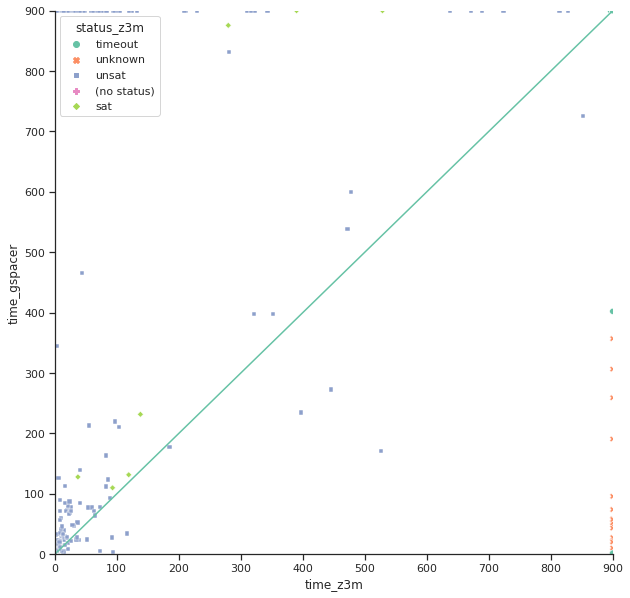

In [8]:
plt.xlim(0, timeout)
plt.ylim(0, timeout)
g = sns.scatterplot(x='time_z3m', y='time_gspacer', hue='status_z3m', style='status_z3m', data=m)
sns.despine()
x = np.linspace(0, timeout, 2)
g.plot(x, x)

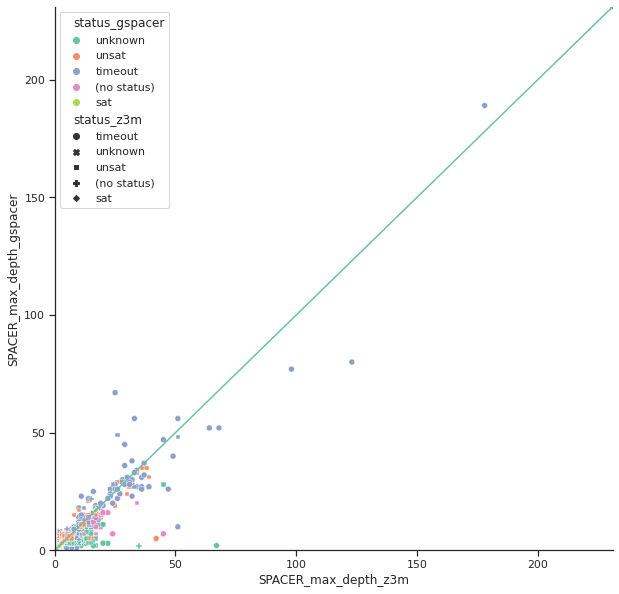

In [9]:
max_depth_max: float = max(m['SPACER_max_depth_gspacer'].max(), m['SPACER_max_depth_z3m'].max())
plt.xlim(0, max_depth_max)
plt.ylim(0, max_depth_max)
g = sns.scatterplot(x='SPACER_max_depth_z3m', y='SPACER_max_depth_gspacer', hue='status_gspacer', style='status_z3m', data=m)
sns.despine()
x = np.linspace(0, max_depth_max, 2)
g.plot(x, x)

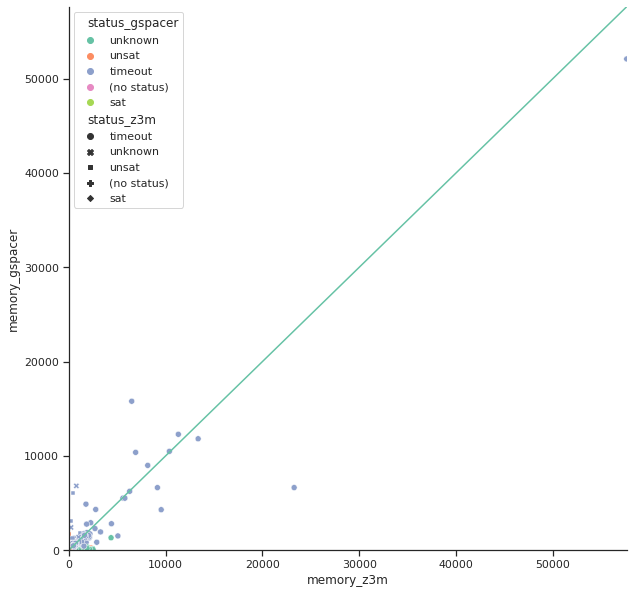

In [10]:
memory_max: float = max(m['memory_gspacer'].max(), m['memory_z3m'].max())
plt.xlim(0, memory_max)
plt.ylim(0, memory_max)
g = sns.scatterplot(x='memory_z3m', y='memory_gspacer', hue='status_gspacer', style='status_z3m', data=m)
sns.despine()
x = np.linspace(0, memory_max, 2)
g.plot(x, x)